# Model Evaluation

## 모델 평가
- 우리가 만든 모델이 얼마나 좋은지 확인하려면, 다양한 모델, 다양한 파라미터를 두고 상대적으로 비교하는 방법을 활용
- 회귀 모델 평가
	- 실제 값과의 에러치를 가지고 계산
    - 연속된 변수값을 이용
- 분류 모델 평가 항목
    - 정확도
    - 오차행렬
    - 정밀도
    - 재현율

### 이진 분류 모델 평가
- 모델 결과 값 종류
	- TP
		- True Positive
		- 실제 Positive를 Positive로 맞춘 경우
	- FN
		- False Negative
		- 실제 Positive를 Negative로 틀리게 예측한 경우
	- TN
		- True Negative
		- 실제 Negative를 Negative로 맞춘 경우
	- FP
		- False Positive
		- 실제 Negative를 Positive로 틀리게 예측한 경우
- Accuracy
	- 전체 데이터 중 맞게 예측한 것의 비율
	- ${TP+TN\over TP+TN+FP+FN}$
- Precision
	- 양성이라고 예측한 것 중에서 실제 양성의 비율
	- ${TP\over TP+FP}$
	- 정밀도를 높이기 위해서는 확실한 것만 양성이라고 선언해야 함
	- Spam이라고 판정한 것 중에 진짜 Spam인 것
-  Recall
	- 참인 데이터들 중에서 참이라고 예측한 것
	- ${TP \over TP+FN}$
	- 놓치면 안되는 일을 신경써야 할 때
	- 실제로 암을 보유한 사람 중 암 환자라고 제대로 판정한 비율
- Fallout
	- 실제 양성이 아닌데, 양성이라고 잘못 예측한 비율
	- ${FP\over FP+TN}$

### 분류 모델 반환 / 평가 지표
- 분류 모델은 그 결과를 속할 비율(확률)을 반환
	- 이중 분류
		- 그 비율에서 threshold를 0.5로 두고, 0과 1로 결과를 반영함
        - threshold를 바꾸어 가면서 모델 평가 지표를 관찰하기
	- 다중 분류
		- 가장 높은 확률값이 있는 클래스를 해당 값으로 결과를 반영
- Recall과 Precision은 서로 영향을 주기 때문에, 한 쪽을 극단적으로 높게 설정해서는 안됨
- F1-Score
	- Recall과 precision을 결합한 지표
	- 어느 한쪽으로 치우치지 않고 둘 다 높은 값을 가질 수록 높은 값을 가짐
	- $F_\beta = (1+\beta^2)(precision\times recall)(\beta^2precision+recall)$
	- $F_1 = 2\cdot precision \cdot recall / (precision+recall)$
		- 조화평균 형태

In [1]:
import pandas as pd

red_url = 'https://raw.githubusercontent.com/PinkWink' +\
    '/ML_tutorial/master/dataset/winequality-red.csv'
white_url = 'https://raw.githubusercontent.com/PinkWink' +\
    '/ML_tutorial/master/dataset/winequality-white.csv'

red_wine = pd.read_csv(red_url, sep = ';')
white_wine = pd.read_csv(white_url, sep = ';')

red_wine['color'] = 1
white_wine['color'] = 0

wine = pd.concat([red_wine, white_wine])

X = wine.drop(['color'], axis = 1)
y = wine['color']

wine['taste'] = [1. if grade > 5 else 0. for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size = 0.2,
                                                   random_state = 13
                                                  )

wine_tree = DecisionTreeClassifier(max_depth = 2,
                                    random_state = 13)
wine_tree.fit(X_train, y_train)

y_pred_tr = wine_tree.predict(X_train)
y_pred_test = wine_tree.predict(X_test)

print('Train ACC: ', accuracy_score(y_train, y_pred_tr))
print('Test ACC: ', accuracy_score(y_test, y_pred_test))

Train ACC:  0.7294593034442948
Test ACC:  0.7161538461538461


In [3]:
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, roc_curve)

print('Accuracy: ', accuracy_score(y_test, y_pred_test))
print('Recall: ', recall_score(y_test, y_pred_test))
print('Precision: ', precision_score(y_test, y_pred_test))
print('AUC Score: ', roc_auc_score(y_test, y_pred_test))
print('F1 Score: ', f1_score(y_test, y_pred_test))

Accuracy:  0.7161538461538461
Recall:  0.7314702308626975
Precision:  0.8026666666666666
AUC Score:  0.7105988470875331
F1 Score:  0.7654164017800381


## ROC 커브 그리기
- ROC 곡선
	- FPR이 변화할 때 TPR의 변화를 그린 그림
	- FPR을 x축, TPR을 y축으로 놓고 그림
	- TPR은 Recall(Sensitivity), FPR은 Fall-out(1-Specificity)을 의미
	- 직선에 가까울 수록 ML 모델 성능이 떨어짐
    - FPR이 동일할 때, TPR은 더 작은 것을 선택함

## AUC
- ROC 곡선 아래 면적
- 전부 맞추면 1
- 기울기가 1인 직선 아래 면적이 0.5
    - 적어도 0.5보다는 커야 함
- `from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score)`
    - 정확도랑 관련있는 각종 수치 지표 불러오기
- `from sklearn.metrics import roc_curve`
    - roc_curve 함수 불러오기
- `fpr, tpr, thresholds = roc_curve(y_test, pred_proba)`
    - 위의 값을 이용해 AUC 그리기
    - `plt.plot(fpr, tpr)`

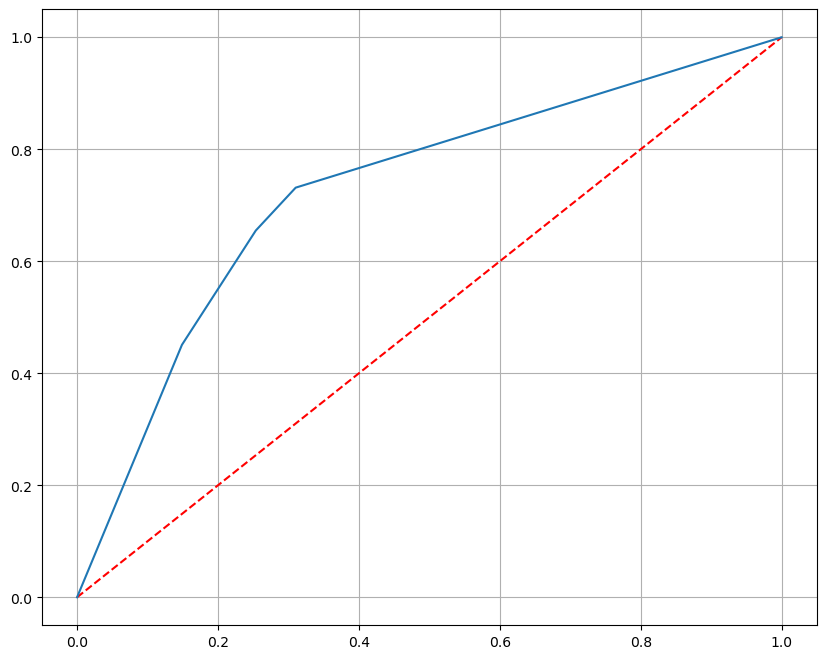

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

pred_proba = wine_tree.predict_proba(X_test)[:, 1] # 1(양성)일 확률만 가져옴
fpr, tpr, thresholds = roc_curve(y_test, pred_proba)

plt.figure(figsize = (10, 8))
plt.plot([0, 1], [0, 1], 'r', ls = 'dashed') # 점근선
plt.plot(fpr, tpr)
plt.grid()
plt.show()

In [5]:
print(fpr)
print(tpr)
print(thresholds)

[0.         0.14884696 0.25366876 0.31027254 1.        ]
[0.         0.45078979 0.65492102 0.73147023 1.        ]
[       inf 0.87802198 0.72692794 0.67447307 0.38397406]


## 수학 기초
- `변수명1, 변수명2 = np.meshgrid(변수1, 변수2)`
	- 여러 변수를 한 번에 사용할 수 있음